In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df=pd.merge(ride_df, city_df, how='inner', on=["city", "city"])

# Display the data table for preview
combined_df["city"] = combined_df["city"].astype(str)



## Bubble Plot of Ride Sharing Data

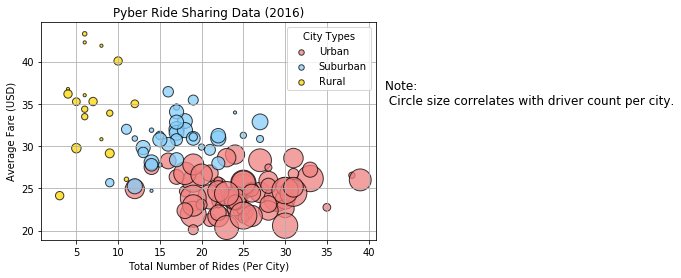

In [2]:
#I do not know how to write a function.  Instead I am copying and pasting twice

urban_df = combined_df.loc[combined_df["type"]=="Urban", :]
urban_df_means = urban_df.groupby("city")["fare", "driver_count"].mean()
urban_df_sum = urban_df.groupby("city")["fare"].count()
urban_df_combined = pd.DataFrame({"Average Fare" : urban_df_means["fare"],
                                    "# of Rides" :urban_df_sum,
                                     "# of Drivers" :urban_df_means["driver_count"] })

# Here is my next attmpt trying different things while looking at Suburban Data
suburban_df = combined_df.loc[combined_df["type"]=="Suburban", :]
suburban_df_means = suburban_df.groupby("city")["fare", "driver_count"].mean()
suburban_df_sum = suburban_df.groupby("city")["fare"].count()
suburban_df_combined = pd.DataFrame({"Average Fare" : suburban_df_means["fare"],
                                    "# of Rides" :suburban_df_sum,
                                     "# of Drivers" :suburban_df_means["driver_count"] })

# Here is my next attmpt trying different things while looking at Suburban Data
rural_df = combined_df.loc[combined_df["type"]=="Rural", :]
rural_df_means = rural_df.groupby("city")["fare", "driver_count"].mean()
rural_df_sum = rural_df.groupby("city")["fare"].count()
rural_df_combined = pd.DataFrame({"Average Fare" : rural_df_means["fare"],
                                    "# of Rides" :rural_df_sum,
                                     "# of Drivers" :rural_df_means["driver_count"] })


# Build the scatter plots for each city types
Urban = plt.scatter(urban_df_combined["# of Rides"], urban_df_combined["Average Fare"], facecolors="lightcoral", edgecolors="black",  s=10*urban_df_combined['# of Drivers'], alpha=0.75, label = 'Urban')
Suburban = plt.scatter(suburban_df_combined["# of Rides"], suburban_df_combined["Average Fare"], facecolors="lightskyblue", edgecolors="black",  s=10*suburban_df_combined['# of Drivers'], alpha=0.75, label = 'Suburban')
Rural = plt.scatter(rural_df_combined["# of Rides"], rural_df_combined["Average Fare"], facecolors="gold", edgecolors="black",  s=10*rural_df_combined['# of Drivers'], alpha=.75, label = 'Rural')
# Incorporate the other graph properties

plt.grid(True)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare (USD)')

# Create a legend

legend = plt.legend(title = "City Types", handles = [Urban, Suburban, Rural], loc='best')

# Text Label
plt.text(42,35,"Note: \n Circle size correlates with driver count per city.", fontsize=12)


# Incorporate a text label regarding circle size
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Save Figure
plt.savefig("../Images/pyber_data_scatter.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

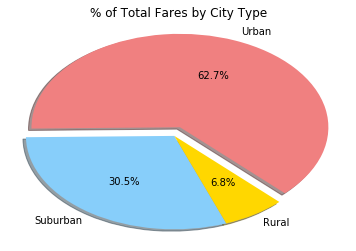

In [4]:
# Calculate Type Percents

urban_total = urban_df["fare"].sum()
suburban_total = suburban_df["fare"].sum()
rural_total = rural_df["fare"].sum()

# urban_percent = urban_total/total
# suburban_percent = suburban_total/total
# # rural_percent = rural_total/total


# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_total, suburban_total, rural_total]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-45)   

plt.axis("tight")


# Save Figure

plt.savefig("../Images/pyber_data_pie_fare.png")


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

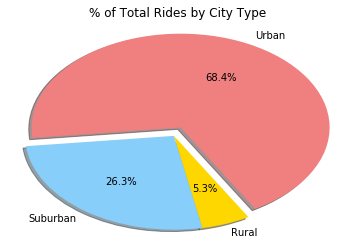

In [6]:
# Calculate Ride Percents

urban_total = urban_df["fare"].count()
suburban_total = suburban_df["fare"].count()
rural_total = rural_df["fare"].count()

# urban_percent = urban_total/total
# suburban_percent = suburban_total/total
# # rural_percent = rural_total/total


# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_total, suburban_total, rural_total]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("% of Total Rides by City Type")
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)   

plt.axis("tight")


# Save Figure

plt.savefig("../Images/pyber_data_pie_rides.png")




In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

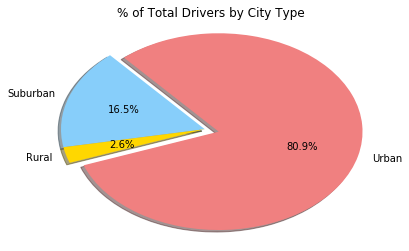

In [8]:
# Calculate Ride Percents

urban_df = city_df.loc[city_df["type"]=="Urban", :]
suburban_df = city_df.loc[city_df["type"]=="Suburban", :]
rural_df = city_df.loc[city_df["type"]=="Rural", :]

total = combined_df["fare"].count()
urban_total = urban_df["driver_count"].sum()
suburban_total = suburban_df["driver_count"].sum()
rural_total = rural_df["driver_count"].sum()

# urban_percent = urban_total/total
# suburban_percent = suburban_total/total
# # rural_percent = rural_total/total


# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_total, suburban_total, rural_total]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("% of Total Drivers by City Type")
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)   

plt.axis("tight")


# Save Figure

plt.savefig("../Images/pyber_data_pie_drivers.png")


In [9]:
# Show Figure
plt.show()

In [ ]:
# My Three Observations:
    
# 1) The majority of drivers are in urban cities.
# 2) There are far fewere drivers in rural cities compared to urban cities, and the average 
#     fare in a rural city is much higher than that in an urban city.
# 3) Compared to urban cities, suburban cities have fewer rides per city and a higher fare per ride.